## 과제
1. 네이버 증권사이트의 주가 그래프와 yahoo finance에서 불러온 주가 그래프 비교하여 이미지를 capture하시오.
  - 조건: 기간 2025.01.04 ~ 2025.05.07 종가기준
2. 히트맵 만들기
  - 종목명 : 아모레퍼시픽, 추가적으로 3개의 종목을 선정, 총 4개의 종목
  - 추가 종목 : LG생활건강, 클리오, 코스맥스

In [ ]:
pip install yfinance

In [22]:
# yahoo finance에서 주가 데이터 가져오기
import yfinance as yf

# 종목명 → 티커 매핑
ticker_dict = {
    'Amorepacific': '090430.KS',
    'LG_H&H': '051900.KS',
    'Clio': '237880.KQ',
    'Cosmax': '192820.KQ'
}

data = yf.download(list(ticker_dict.values()), start='2025-01-04', end='2025-05-07')['Close']
# 컬럼 순서를 ticker_dict의 values 순서대로 정렬
data = data[list(ticker_dict.values())]

# 열 이름을 종목명으로 바꾸기 (선택 사항)
data.columns = list(ticker_dict.keys())

# 수익률 계산
returns = data.pct_change().dropna()

display(data.head())

[*********************100%***********************]  4 of 4 completed


,Amorepacific,LG_H&H,Clio,Cosmax
Date,,,,
2025-01-06,114579.054688,308680.84375,18180.0,143400.0
2025-01-07,114678.000000,307691.50000,17990.0,145500.0
2025-01-08,113886.429688,307691.50000,18140.0,149000.0
2025-01-09,114183.273438,308680.84375,18690.0,150400.0
2025-01-10,114480.109375,302744.68750,18100.0,147400.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

for col in data.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(data.index, data[col], label=col, color='tab:blue')
    plt.title(f"{col} Stock Price (Close)")
    plt.xlabel("Date")
    plt.ylabel("Price (KRW)")
    plt.legend(loc='upper left')
    plt.grid(True)

    # 파일로 저장
    filename = f"Y_{col}.png"
    plt.savefig(filename)
    plt.close()  # 메모리 해제

### 📊 주가 데이터 비교 (Yahoo Finance vs Naver 증권)

| 종목명 | Yahoo Finance | Naver 증권 |
|--------|----------------|-------------|
| **Amorepacific** | ![야후 데이터](Y_Amorepacific.png) | ![네이버 사이트](N_Amorepacific.png) |
| **LG생활건강 (LG H&H)** | ![야후 데이터](Y_LG_H&H.png) | ![네이버 사이트](N_LG_H&H.png) |
| **Clio** | ![야후 데이터](Y_Clio.png) | ![네이버 사이트](N_Clio.png) |
| **Cosmax** | ![야후 데이터](Y_Cosmax.png) | ![네이버 사이트](N_Cosmax.png) |


### 히트맵 그리기

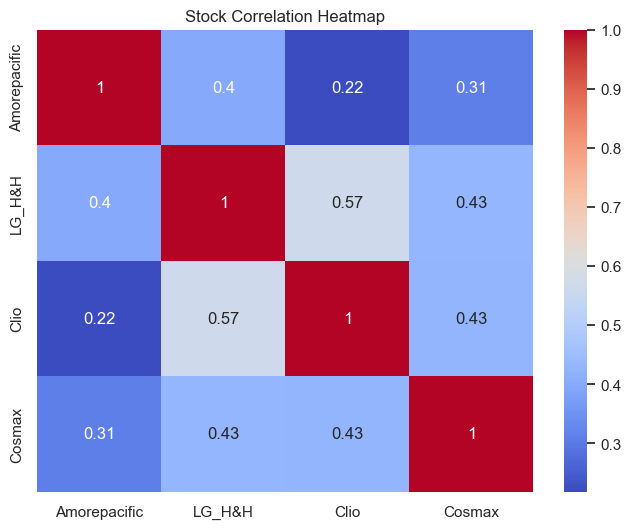

In [7]:
plt.figure(figsize=(8,6))
# plt.figure(figsize=(8,6), dpi=100) #800 x 600 사이즈 기본단위 인치치
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Correlation Heatmap")
plt.show()